In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.linear_model import LinearRegression

In [2]:
billboard_df = pd.read_csv('data/billboard_hot_100_1958_2019.csv')
audio_df = pd.read_csv('data/audio_features_hot_100_1958_2019.csv')

In [3]:
billboard_audio = pd.merge(audio_df, billboard_df, how='inner', on = 'track_id')

In [4]:
billboard_audio

,track_id,artist_x,track_x,spotify_genre,spotify_track_id,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,...,tempo,time_signature,week_id,week_pos,track_y,artist_y,instance,prev_week_pos,peak_pos,weeks_on_chart
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,80.002,4.0,2019-10-12,98,Adicto,"Tainy, Anuel AA & Ozuna",1,86.0,86,2
1,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,80.002,4.0,2019-10-05,86,Adicto,"Tainy, Anuel AA & Ozuna",1,NaN,86,1
2,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-10-12,92,The Ones That Didn't Make It Back Home,Justin Moore,1,72.0,46,16
3,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-10-05,72,The Ones That Didn't Make It Back Home,Justin Moore,1,66.0,46,15
4,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-09-28,66,The Ones That Didn't Make It Back Home,Justin Moore,1,66.0,46,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321013,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,173.305,3.0,1965-06-26,42,Tonight's The Night,Solomon Burke,1,54.0,42,5
321014,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,173.305,3.0,1965-06-19,54,Tonight's The Night,Solomon Burke,1,70.0,54,4
321015,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,173.305,3.0,1965-06-12,70,Tonight's The Night,Solomon Burke,1,70.0,70,3
321016,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,173.305,3.0,1965-06-05,70,Tonight's The Night,Solomon Burke,1,80.0,70,2


In [5]:
del billboard_audio['track_y']
del billboard_audio['artist_y']

billboard_audio = billboard_audio.rename(columns={'track_x': 'track', 'artist_x':'artist'})

billboard_audio

,track_id,artist,track,spotify_genre,spotify_track_id,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,...,liveness,valence,tempo,time_signature,week_id,week_pos,instance,prev_week_pos,peak_pos,weeks_on_chart
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,0.179,0.623,80.002,4.0,2019-10-12,98,1,86.0,86,2
1,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,0.179,0.623,80.002,4.0,2019-10-05,86,1,NaN,86,1
2,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-10-12,92,1,72.0,46,16
3,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-10-05,72,1,66.0,46,15
4,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-09-28,66,1,66.0,46,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321013,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-26,42,1,54.0,42,5
321014,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-19,54,1,70.0,54,4
321015,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-12,70,1,70.0,70,3
321016,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-05,70,1,80.0,70,2


In [6]:
billboard_audio.isnull()

,track_id,artist,track,spotify_genre,spotify_track_id,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,...,liveness,valence,tempo,time_signature,week_id,week_pos,instance,prev_week_pos,peak_pos,weeks_on_chart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
321014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
321015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
321016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
new_df = billboard_audio.dropna()
new_df2 = new_df.drop_duplicates(subset=None, keep="first", inplace=False)

In [8]:
new_df2

,track_id,artist,track,spotify_genre,spotify_track_id,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,...,liveness,valence,tempo,time_signature,week_id,week_pos,instance,prev_week_pos,peak_pos,weeks_on_chart
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,0.734,...,0.179,0.623,80.002,4.0,2019-10-12,98,1,86.0,86,2
18,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,...,0.231,0.323,95.799,4.0,2019-08-17,49,1,47.0,1,45
19,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,...,0.231,0.323,95.799,4.0,2019-08-10,47,1,47.0,1,44
20,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,...,0.231,0.323,95.799,4.0,2019-08-03,47,1,48.0,1,43
21,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,A Star Is Born Soundtrack,0.0,215733.0,88.0,0.572,...,0.231,0.323,95.799,4.0,2019-07-27,48,1,45.0,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321012,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-07-03,32,1,42.0,32,6
321013,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-26,42,1,54.0,42,5
321014,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-19,54,1,70.0,54,4
321015,Tonight's The NightSolomon Burke,Solomon Burke,Tonight's The Night,"['brill building pop', 'classic soul', 'funk',...",18TM70njJRFH4Fm4ZuwLd8,The Very Best Of Solomon Burke,0.0,161186.0,28.0,0.318,...,0.600,0.633,173.305,3.0,1965-06-12,70,1,70.0,70,3


In [9]:
X = new_df2[['peak_pos','instance','danceability','energy', 'loudness','speechiness','instrumentalness','liveness','valence','tempo']]
y = new_df2.weeks_on_chart.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (252690, 10) (252690, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [14]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

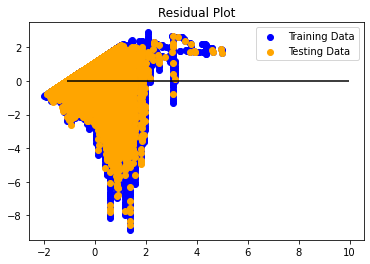

In [15]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6258918481971388, R2: 0.37795584062182275
